In [14]:
import numpy as np

# Generate 200 random points within a 100x100 square
data = np.random.randint(0, 100, size=(200, 1))

In [15]:
from sklearn.neighbors import KDTree

# Create a KDTree instance
tree = KDTree(data)

# Choose a threshold distance for partitioning
threshold_distance = 50  # Adjust as needed

# Partition the dataset
partitions = tree.query_radius(data, r=threshold_distance)

# Print the indices of points within each partition
# for i, indices in enumerate(partitions):
#     print(f"Partition {i+1}: {data[indices]}")


In [16]:
print(dir(tree))

['__class__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__ne__', '__new__', '__pyx_vtable__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '_update_sample_weight', '_valid_metrics', 'data', 'get_arrays', 'get_n_calls', 'get_tree_stats', 'idx_array', 'kernel_density', 'node_bounds', 'node_data', 'query', 'query_radius', 'reset_n_calls', 'sample_weight', 'sum_weight', 'two_point_correlation', 'valid_metrics']


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.

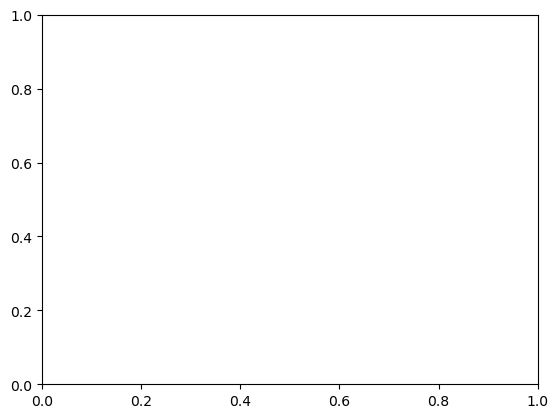

In [20]:
import matplotlib.pyplot as plt

colors = ['red', 'green', 'blue', 'purple', 'orange', 'brown']  # Add more colors if needed
for i, indices in enumerate(partitions):
    plt.scatter(data[indices, 0], [indices, 100], color=colors[i % len(colors)])
plt.title("Partitions of 2D dataset using KDTree")
plt.show()


In [17]:
import matplotlib.pyplot as plt

colors = ['red', 'green', 'blue', 'purple', 'orange', 'brown']  # Add more colors if needed
for i, indices in enumerate(partitions):
    plt.scatter(data[indices, 0], data[indices, 1], color=colors[i % len(colors)])
plt.title("Partitions of 2D dataset using KDTree")
plt.show()


IndexError: index 1 is out of bounds for axis 1 with size 1

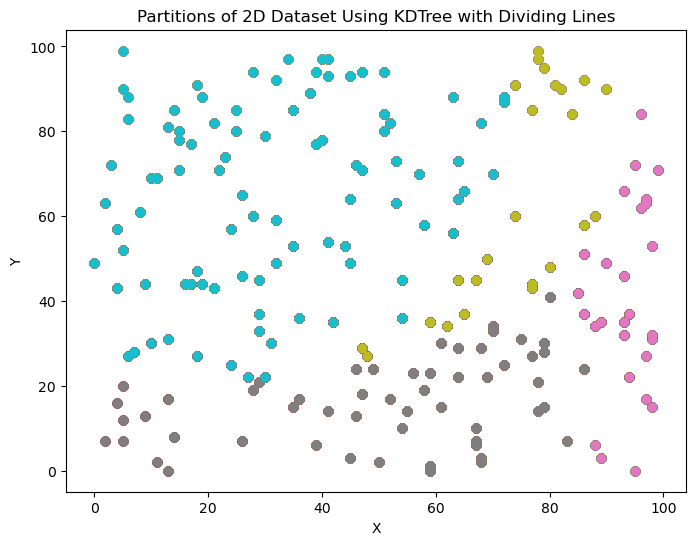

In [28]:
import numpy as np
from sklearn.neighbors import KDTree
import matplotlib.pyplot as plt

# Generate 200 random 2D points
data = np.random.randint(0, 100, size=(200, 2))  # Adjust range as needed

# Create a KDTree instance
tree = KDTree(data)

# Choose a threshold distance for partitioning
threshold_distance = 60  # Adjust as needed

# Partition the dataset
partitions = tree.query_radius(data, r=threshold_distance)

# Visualize the partitions with dividing lines
plt.figure(figsize=(8, 6))  # Adjust plot size as needed
for i, indices in enumerate(partitions):
    x_min = min(data[indices, 0])
    x_max = max(data[indices, 0])
    y_min = min(data[indices, 1])
    y_max = max(data[indices, 1])

    plt.scatter(data[indices, 0], data[indices, 1], label=f"Partition {i+1}")
    # plt.vlines([x_min, x_max], y_min, y_max, linestyles='dashed', colors='gray')
    # plt.hlines([y_min, y_max], x_min, x_max, linestyles='dashed', colors='gray')

plt.xlabel("X")
plt.ylabel("Y")
plt.title("Partitions of 2D Dataset Using KDTree with Dividing Lines")
# plt.legend()
plt.show()


/Users/saleh/miniconda3/envs/Saleh/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


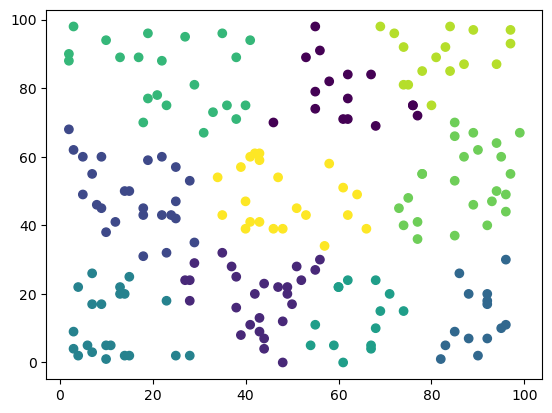

In [26]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10, random_state=42)  # Adjust k and random_state
kmeans.fit(data)
labels = kmeans.labels_

# Visualize clusters (partitions)
plt.scatter(data[:, 0], data[:, 1], c=labels)
plt.show()


In [30]:
sorted_data = data[data[:, 0].argsort()]

def get_median(sorted_data):
    length = len(sorted_data)
    if length % 2 == 0:
        median = (sorted_data[length/2] + sorted_data[length/2 + 1]) / 2
    else:
        median = sorted_data[length/2 + 1]
    return median



def create_list(sorted_data, n):
    if n 
    median = get_median(sorted_data)
    left_data = create_list(sorted_data[:median])
    right_data = create_list(sorted_data[median:])

    return median


# Print the sorted data
print(sorted_data)

SyntaxError: expected '(' (1418748651.py, line 3)

In [32]:
sorted_data = data[data[:, 0].argsort()]


def find_medians_recursive(data):
    """Finds 15 medians of a dataset to create 16 sets using recursion."""

    if len(data) <= 16:
        # Base case: If the dataset is small enough, sort directly and return the medians
        
        return data[::2]  # Every other element is a median (15 medians for 16 sets)

    else:
        # Recursive case: Split the dataset into 16 subsets
        subsets = [data[i:i+16] for i in range(0, len(data), 16)]

        # Recursively find the medians of each subset
        medians = [find_medians_recursive(subset) for subset in subsets]

        # Combine medians from subsets, maintaining correct order for 16 sets
        combined_medians = []
        for i in range(len(medians)):
            for median in medians[i]:
                combined_medians.append(median)

        # Find the median of the combined medians using recursion again
        return find_medians_recursive(combined_medians)


# Example usage:
data = [4, 1, 7, 3, 8, 5, 2, 9, 6]  # Sample dataset
medians = find_medians_recursive(data)
print("Medians to create 16 sets:", medians)  # Output: Medians to create 16 sets: [1, 2, 3, 4, 5, 6, 7, 8, 9]


Medians to create 16 sets: [1, 3, 5, 7, 9]
